In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import f_oneway

### 0. Data Prep

In [2]:
# Load training data (labelled)
train = pd.read_csv('train_data.csv')
t_id_genre = pd.read_csv('songs_train.csv')
t_id_genre = t_id_genre[['song_id', 'genre']]
train = pd.concat([train, t_id_genre], axis =1)
train = train.set_index('song_id')
train.head()

,audio_danceability,audio_energy,audio_loudness,audio_mode,audio_speechiness,audio_acousticness,audio_instrumentalness,audio_liveness,audio_valence,audio_tempo,...,lyrics_yet,lyrics_yo,lyrics_york,lyrics_young,Spanish,AAVE,Non_word,Swear_word,Drug_ref,genre
song_id,,,,,,,,,,,,,,,,,,,,,
1,0.533376,1.112355,1.720178,-1.229047,-0.775614,-0.540626,-0.248563,-0.034074,0.705204,0.158165,...,-0.108003,-0.26561,-0.092654,-0.209802,0,0,1,0,0,pop
2,0.229876,1.112355,0.894297,0.813591,-0.843487,-0.640793,-0.248578,1.866319,0.342874,0.124053,...,-0.108003,-0.26561,-0.092654,-0.209802,0,0,0,0,0,pop
3,0.267813,-0.018664,0.389098,0.813591,-0.822178,-0.485311,-0.248578,-0.861728,-0.108920,-0.524996,...,-0.108003,-0.26561,-0.092654,-0.209802,0,0,1,1,1,pop
4,0.710418,0.241885,1.103345,0.813591,-0.820600,0.106717,-0.248551,0.221496,0.526276,-0.082500,...,-0.108003,-0.26561,-0.092654,-0.209802,0,0,0,0,0,pop
5,0.602928,0.768904,0.278530,0.813591,-0.883737,-0.458400,-0.248466,-0.723458,0.181839,0.089668,...,-0.108003,-0.26561,-0.092654,-0.209802,0,0,1,0,0,pop


In [3]:
col_names = list(train.columns.values)

In [4]:
rap = train.loc[train['genre']=='rap']
hiphop = train.loc[train['genre']=='hip hop']
raphop = pd.concat([rap, hiphop])

In [5]:
audio_features = ['audio_danceability', 'audio_energy', 'audio_loudness', 'audio_mode', 'audio_speechiness',
                  'audio_acousticness', 'audio_instrumentalness', 'audio_liveness', 'audio_valence', 'audio_tempo']

In [15]:
rapsum = list(rap.sum())
hipsum = list(hiphop.sum())
diff = pd.DataFrame(data = [rapsum,hipsum], columns = col_names)
diff = diff.drop(columns = 'genre')
diff_tran = diff.T
diff_tran.columns = ['rap', 'hiphop']
diff_tran['diff'] = diff_tran['rap'] - diff_tran['hiphop']
diff_tran['diff'] = diff_tran['diff'].abs()
diff_tran = diff_tran.sort_values(by = 'diff', ascending = False)
diff_tran

,rap,hiphop,diff
lyrics_letra,823.653112,-309.072455,1132.725567
lyrics_que,803.809530,-293.775032,1097.584561
lyrics_es,820.537551,-276.410535,1096.948086
lyrics_en,811.789098,-283.862557,1095.651656
lyrics_de,779.874048,-279.249802,1059.123850
...,...,...,...
lyrics_paper,240.796197,241.944167,1.147970
lyrics_crib,307.319603,308.445132,1.125529
lyrics_ballin,176.240049,177.027315,0.787265
lyrics_call,225.548631,224.885757,0.662874


In [7]:
diff_tran.to_csv('rap_hiphop_diff.csv')

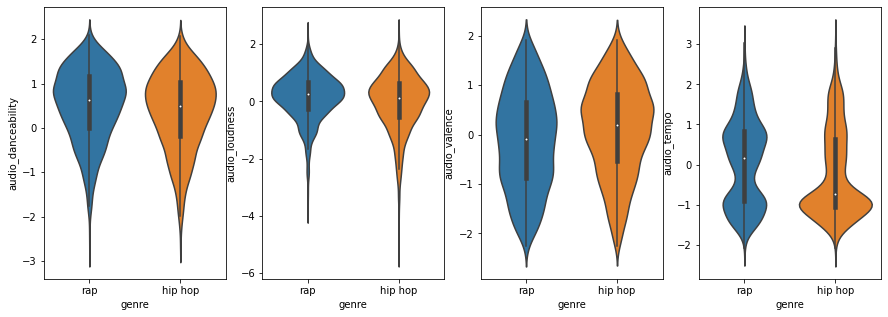

In [16]:
# Distribution
fig, ax = plt.subplots(1,4, figsize=(15, 5))
sns.violinplot(data=raphop, x="genre", y="audio_danceability", ax = ax[0])
sns.violinplot(data=raphop, x="genre", y="audio_loudness", ax = ax[1])
sns.violinplot(data=raphop, x="genre", y="audio_valence", ax = ax[2])
sns.violinplot(data=raphop, x="genre", y="audio_tempo", ax = ax[3])
fig.savefig('../writeup/Figures/raphop_violinplots.jpg');

In [9]:
raphop['tempo_val'] = raphop['audio_tempo']*raphop['audio_valence']

<AxesSubplot:xlabel='genre', ylabel='tempo_val'>

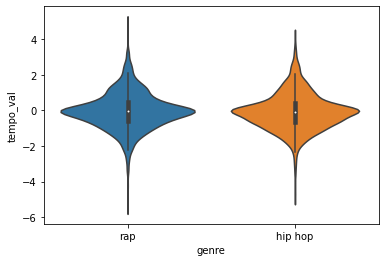

In [10]:
sns.violinplot(data=raphop, x="genre", y="tempo_val")